Zad. 1. Rozważmy oscylator harmoniczny z wymuszeniem kinematycznym, tzn. rozważmy
masę m zawieszoną na sprężynie o stałej sprężystości k i tłumieniu f, na które
działa siła F. Wymuszenie kinematyczne jest to zmienne w czasie przemieszczenie
sprężystego i/lub tłumiącego elementu układu połączonego z masą układu.

(a) Wykonać w Simulinku model ruchu oscylatora harmonicznego. Wygenerować
wykresy opisujące położenie ciała oraz wymuszenie w czasie t ∈ [0, 10].

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [198]:
m = 0.0253  # masa [kg]
f = 0.1  # tłumienie [kg/s]
k = 1  # stała sprężystości [N/m]

m * a + f * v + k * x = k * x1(t)  
m * a = k * x1(t) - f * v - k * x  
a = (k * x1(t)) / m - (f * v) / m - (k * x) / m  
a = (k * x1(t) - f * v - k * x) / m  

In [199]:
x0 = 0  # początkowe położenie
v0 = 0  # początkowa prędkość

In [200]:
def x1(t):
    if (t % 6) < 3:
        return 1  # wartość 1 przez 3 s.
    else:
        return 0  # wartość 0 przez kolejne 3 s.

In [201]:
def oscylator_harmoniczny(t, y):
    x, v = y
    a = (k * x1(t) - f * v - k * x) / m
    return [v, a]

In [202]:
przedzial_czasu = (0, 10)
probki_czasu = np.linspace(*przedzial_czasu, 1000)

In [203]:
rozwiazanie = solve_ivp(fun=oscylator_harmoniczny, t_span=przedzial_czasu, y0=[x0, v0], t_eval=probki_czasu)
t = rozwiazanie.t
x = rozwiazanie.y[0]
wartosci_x1 = np.array([x1(t_i) for t_i in t])

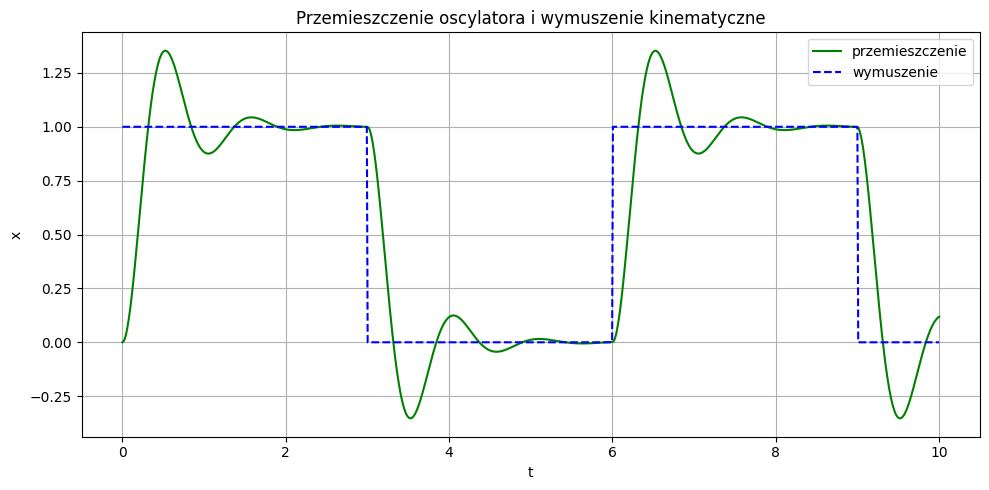

In [204]:
plt.figure(figsize=(10, 5))

plt.plot(t, x, label='przemieszczenie', color='green')
plt.plot(t, wartosci_x1, label='wymuszenie', color='blue', linestyle='--')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Przemieszczenie oscylatora i wymuszenie kinematyczne')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

(b) Dobrać tłumienie f tak, aby nie występowały przeregulowania.

In [205]:
f = 0.3  # tłumienie [kg/s]

rozwiazanie = solve_ivp(fun=oscylator_harmoniczny, t_span=przedzial_czasu, y0=[x0, v0], t_eval=probki_czasu)
t = rozwiazanie.t
x = rozwiazanie.y[0]
wartosci_x1 = np.array([x1(t_i) for t_i in t])

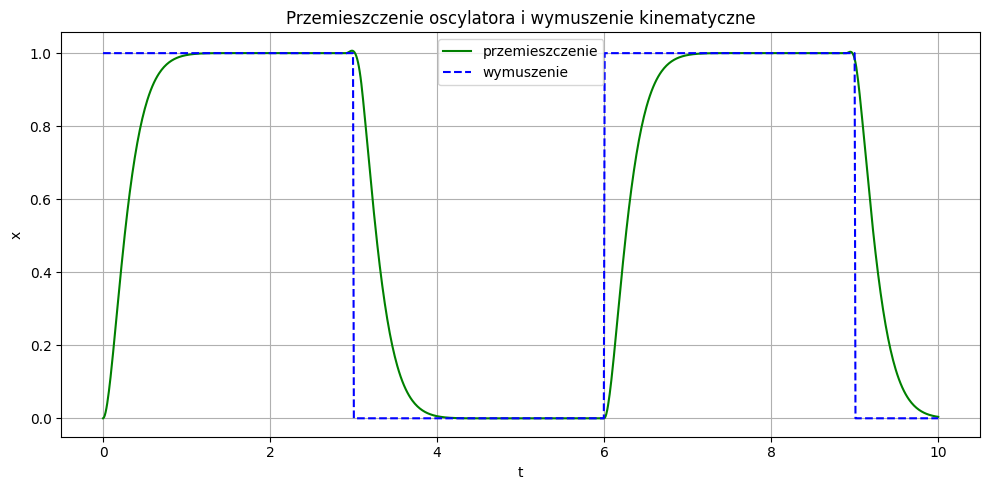

In [206]:
plt.figure(figsize=(10, 5))

plt.plot(t, x, label='przemieszczenie', color='green')
plt.plot(t, wartosci_x1, label='wymuszenie', color='blue', linestyle='--')

plt.xlabel('t')
plt.ylabel('x')
plt.title('Przemieszczenie oscylatora i wymuszenie kinematyczne')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Zad. 2. Rozważmy masę m zawieszoną na sprężynie o stałej sprężystości k i tłumieniu f,
na które działa siła F.

(a) Wykonać w Simulinku model ruchu oscylatora harmonicznego. Wygenerować
wykresy opisujące przyspieszenie, prędkość i położenie ciała w czasie t ∈ [0, 20].
Parametry modelu zdefiniować w ramach funkcji/skryptu.

In [207]:
m = 1250  # masa [kg]
f = 100  # tłumienie [kg/s]
k = 1250  # stała sprężystości [N/m]

In [208]:
def funkcja(t):
    return 0 if t < 1 else 25

In [209]:
def oscylator_harmoniczny_v2(t, y):
    x, v = y
    a = (funkcja(t) - f * v - k * x) / m
    return [v, a]

In [210]:
przedzial_czasu = (0, 20)
probki_czasu = np.linspace(*przedzial_czasu, 1000)

In [211]:
rozwiazanie = solve_ivp(fun=oscylator_harmoniczny_v2, t_span=przedzial_czasu, y0=[x0, v0], t_eval=probki_czasu)
t = rozwiazanie.t
x = rozwiazanie.y[0]
v = rozwiazanie.y[1]
a = (np.array([funkcja(t_i) for t_i in t]) - f * v - k * x) / m

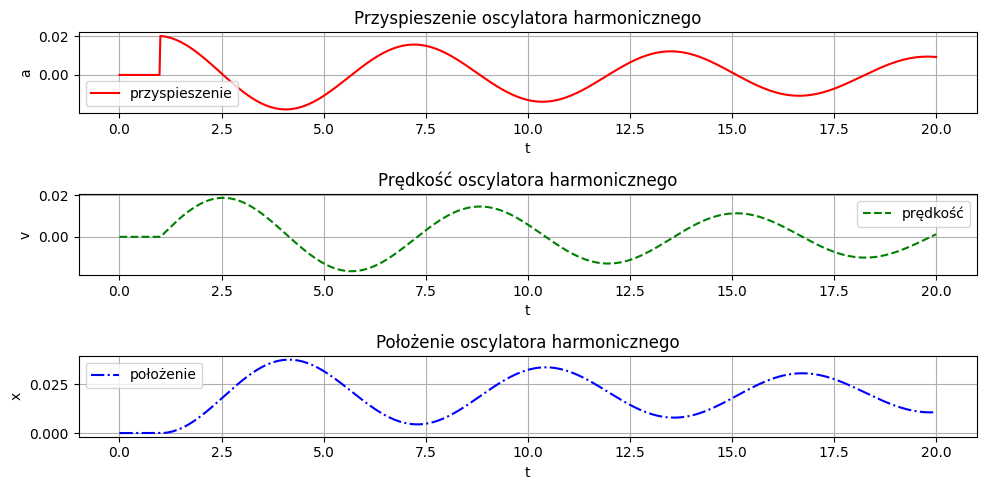

In [212]:
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.plot(t, a, label='przyspieszenie', color='red')
plt.xlabel('t')
plt.ylabel('a')
plt.title('Przyspieszenie oscylatora harmonicznego')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, v, label='prędkość', color='green', linestyle='--')
plt.xlabel('t')
plt.ylabel('v')
plt.title('Prędkość oscylatora harmonicznego')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, x, label='położenie', color='blue', linestyle='-.')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Położenie oscylatora harmonicznego')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()